In [1]:
# https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
# supresses future warnings
import warnings                                                 
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import the pandas library for df creation
import pandas as pd

# Import the NumPy library to use the random package
import numpy as np

# Import the matplotlib library, package pyplot for plotting
import matplotlib.pyplot as plt

# Use magic function to render the figure in a notebook
%matplotlib inline

# Import the seaborn library for plotting
import seaborn as sns

# The NumPy Package produces random numbers using Random Number Generators 
# This defines the process by which numbers are generated for use by NumPy functions 
# Generators are a reliable way to generate random numbers
# numpy.random offers several Random Number Generators. 
# By defining the Generator the your code becomes reliable and repeatable [Machine Learning Mastery, How to Generate Random Numbers in Python, Available at: https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/]
# Sets Generator type (the default BitGenerator - PCG64) with a declared value of 100 [https://numpy.org/doc/stable/reference/random/generator.html]
rng = np.random.default_rng(100)

# Set number of samples based on number of live births in 2016
n = 63739

## Introduction


The project requires us to simulate a real-world phenomenon of our choosing.
We have been asked to model and synthesis data related to this phenomenon using Python, in particular the numpy.random library. The output of the project should be a synthesized data set.

I will be examining the rate of breastfeeding initiation in Ireland.  I will create a dataset of variables associated with breastfeeding. I will simulate the distribution of breastfeeding initiation in a random sample of an identified segment of the population. I will explore the relationships, if any, between these factors and how they may influence the rate of breastfeeding initiation.

This will include:
1.	The distribution of breastfeeding initiation in an identified segment of the population
2.	The factors contributing to breastfeeding initiation
3.	How these factors are distributed in the identified segment of the population

This topic is of particular interest to me as I have been successfully breastfeeding my own daughter for the past year. The publication of the NPRS 2019 report [https://media.npr.org/documents/about/annualreports/2019_Annual_Report.pdf] received widespread news coverage and highlighted the low rates of breastfeeding in Ireland [https://www.irishtimes.com/news/health/ireland-has-one-of-the-lowest-breastfeeding-rates-in-the-world-report-1.4391626] . On reflection I was unable to identify how I had arrived at the decision to breastfeed. I began to read more on the topic including how rates in Ireland compare to international rates and the socio-cultural changes in breastfeeding. From this I identified influencing factors on breastfeeding initiation. While I meet some of the criteria, I do not meet all. And yet as a mother in Ireland exclusively breastfeeding for over 12 months, I am one of only 7%. This intrigued me and I wanted to examine what factors may have influenced my breastfeeding journey. 

### Breastfeeding 

#### What is breastfeeding?
Breastfeeding, or nursing, is the process of providing an infant with their mother’s breastmilk [https://www.who.int/health-topics/breastfeeding]. This is usually done directly from the breast but can also be provided indirectly using expressed breast milk [*Ibid.*]. 
Breastfeeding is important as it offers numerous health benefits for both mother and infant:
Benefits to infant:
* Breast milk is naturally designed to meet the calorific and nutritional needs of an infant [https://www.who.int/news-room/fact-sheets/detail/infant-and-young-child-feeding] and adapts to meet the needs of the infant as they change [https://www.nhs.uk/conditions/baby/breastfeeding-and-bottle-feeding/breastfeeding/benefits]
* Breast milk provides natural antibodies that help to protect against common infections and diseases [*Ibid.*]
* Breastfeeding is associated with better long-term health and wellbeing outcomes including less likelihood developing asthma or obesity and higher income in later life (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1448489/)

Benefits to mother: 
* Breastfeeding lowers the mother’s risk of breast and ovarian cancer, osteoporosis, cardiovascular disease, and obesity (https://www.nhs.uk/conditions/baby/breastfeeding-and-bottle-feeding/breastfeeding/benefits/
). 
* Breastfeeding is associated with lower rates of post-natal depression and fewer depressive symptoms for women who do develop post-natal depression while breastfeeding [Borra, Dennis[.  
* Breastfeeding is a cost effective, safe and hygienic method of infant feeding [https://www.unicef.org/media/media_70044.html]. 

The World Health Organisation (WHO), and numerous other organizations recommend exclusively breastfeeding for the first 6 months of an infant’s life and breastfeeding supplemented by other foods from 6 months on [WHO: https://www.who.int/health-topics/breastfeeding AAP: https://doi.org/10.1542/peds.2011-3552 NHS: https://www.nhs.uk/conditions/baby/breastfeeding-and-bottle-feeding/breastfeeding/ HSE: https://www2.hse.ie/wellbeing/child-health/extended-breastfeeding-beyond-1-year.html]. 
However, globally nearly 2 out of 3 infants are not exclusively breastfed for the first 6 months [WHO: https://www.who.int/health-topics/breastfeeding]. 

Ireland has one of the lowest breastfeeding initiation rates in the world, with 63.8% of mothers breastfeeding for their child's first feed [https://www.hse.ie/eng/about/who/acute-hospitals-division/woman-infants/national-reports-on-womens-health/imis-national-report-2019.pdf]. The rate of breastfeeding drops subtantially within days as on average only 37.3% of mothers are breastfeeding on discharge from hospital [*Ibid.*].

Given the physical, social and economic advantages to breastfeeding over articifical and combination feeding (a mix of breast and artificial) both the WHO and the HSE have undertaken a number of measures to increase the rates of breastfeeding initiation and exclusive breastfeeding for the first six months in Ireland [https://apps.who.int/iris/bitstream/handle/10665/259386/9789241550086-eng.pdf, https://www.hse.ie/eng/about/who/healthwellbeing/our-priority-programmes/child-health-and-wellbeing/breastfeeding-healthy-childhood-programme/research-and-reports-breastfeeding/breastfeeding-on-the-island-of-ireland-report.pdf].

Funded research is one of these measures including national longitudinal studies to identify factors that may influence breastfeeding rates [https://www.hse.ie/eng/about/who/healthwellbeing/our-priority-programmes/child-health-and-wellbeing/breastfeeding-healthy-childhood-programme/research-and-reports-breastfeeding/breastfeeding-in-a-healthy-ireland.html].

A review of some of the completed research projects has identified common factors that have been researched and for which there is a bank of data to refer to. These are identified in the table below:

| Variable Name            | Description        | Data Type | Distribution      |
|--------------------------|--------------------|-----------|-------------------|
| Age                      |                    | Numeric   | Normal/Triangular |
| Civil Status             |                    | Boolean   |                   |
| Private Health Insurance |                    | Boolean   |                   |
| Breastfeeding Initiation | Dependent Variable | Boolean   |                   |

### Age

A review of data provided by the NPRS study is used here to determine how maternal age is distributed across the population - mothers with live births in 2016 (http://www.hpo.ie/latest_hipe_nprs_reports/NPRS_2017/Perinatal_Statistics_Report_2017.pdf).

While age is a numerical value it is presented by NPRS as a categorical variable/discrete groups, ranging from under 20 years of age to 45 years of age and older. The NPRS study provides the frequency and percentages of births within each group.

In [3]:
# Downloaded NPRS_Age.csv from CITE
age = pd.read_csv("Data/Age_and_Feeding_Type.csv", index_col='Age Group')

# Other source: https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe

# https://www.w3resource.com/pandas/dataframe/dataframe-t.php
age = age.T
age = age.iloc[0:4, 0:7]

age

Age Group,Under 20 Years,20-24 Years,25-29 Years,30-34 Years,35-39 Years,40-44 Years,45 Years and Over
Artificial,786,3158,5409,8284,6458,1380,94
Breast,250,1632,4883,12193,10266,2173,144
Combined,66,388,1099,2470,2004,548,54
Total,1102,5178,11391,22947,18728,4101,292


The grouping of data by age group reduces the usefullness of the `describe()` function on the dataframe.However, an initial view of the NPRS data indicates that the data is somewhat normally distributed with births increasing in the 25 - 29 age group, peaking at 30 - 34 years of age and beginning to decline in the 35 - 39 age set. 

Visualising the data set supports this analysis. It shows a minimum value of less than 20 years of age increasing in a positive direction until it significant peak around 32 years of age - the midpoint of the age group with the greatest frequency of births. 

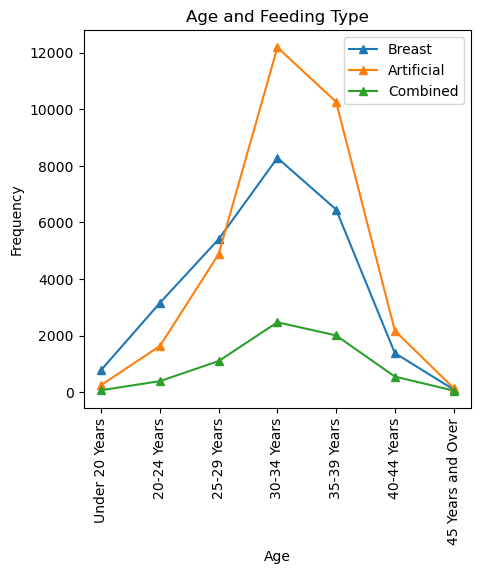

In [30]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
x_pos = np.arange(7)

ax.plot(x_pos, age.iloc[0, :], marker='^', label='Breast')
ax.plot(x_pos, age.iloc[1, :], marker='^', label='Artificial')
ax.plot(x_pos, age.iloc[2, :], marker='^', label='Combined')

ax.set_title('Age and Feeding Type')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
             
ax.set_xticks(x_pos)
ax.set_xticklabels(age.columns, rotation=90)
ax.legend(loc="best")

This can be replicated using a Trinangualr Distribution. This generates a random number from a weighted range by distribuing events between the maximum and minimum values provided, based on a third value that indicates what the most likely outcome will be.[54] Here we are looking for 100 events (births) distributed between the ages of 16 and 50 with a known peak where the mothers age is 32.

Here is your triangular continuous random variable:
 [28 29 27 43 43 31 26 35 36 39 36 23 49 46 37 43 42 39 39 43 29 40 40 36
 34 31 27 41 30 44 23 29 37 23 30 29 29 31 43 31 37 26 35 43 29 24 23 36
 42 33 36 40 31 25 30 27 33 26 38 28 25 32 40 37 38 38 40 45 28 31 32 44
 23 41 45 22 38 44 30 29 31 27 33 26 32 47 22 42 38 32 34 29 44 29 33 33
 30 28 33 31]


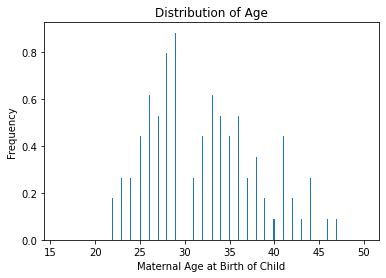

In [3]:
# Here we are looking for a random array with a lower limit of 16 an upper limit of 50
# and 32 being the number that appears most frequently (the mid point of the most frequent age group)
# over n number of instances where n is the total number of births
# and for the out to be presented on a Triangular Distribution plot

Tri_var = np.random.triangular(left = 20, mode = 30, right = 50, size = 100).astype(int)
print ("Here is your triangular continuous random variable:\n % s" % (Tri_var)) # [55]

#  https://stackoverflow.com/questions/60870070/a-weighted-version-of-random-randint
plt.hist(np.ma.round(np.random.triangular(left = 20, mode = 30, right = 50, size = 100)).astype(int),
        range = (16, 50), bins = 300, density = True)

plt.title('Distribution of Age')
plt.xlabel('Maternal Age at Birth of Child')
plt.ylabel('Frequency')
plt.show()

### Civil Status

Univariate analysis by Gallagher shows that maternal marital status at the time of birth is significantly associated with breastfeeding initiation (Gallagher L, Begley C, Clarke M, Determinants of breastfeeding initiation in Ireland., Irish journal of medical science, 185, 3, 2015, 663 - 668).

Data captured in the 2016 NPRS survey does not capture relational data between breastfeeding initiation and maternal marital status at the time of birth (http://www.hpo.ie/latest_hipe_nprs_reports/NPRS_2016/Perinatal_Statistics_Report_2016.pdf). However it does provide percentage values for maternal marital status across all age groups:

| Maternal Civil Status at birth | Percentage of Total births |
|--------------------------------|----------------------------|
| Married                        | 62.2                       |
| Single                         | 36.4                       |
| Other                          | 1.4                        |


CSO data on civil status for 2016 does record information across all age groups (https://www.cso.ie/en/releasesandpublications/er/mcp/marriagesandcivilpartnerships2016/). However, as it only captures data for 
* Marriages
* Civil parnerships
* Divorces, Judicial Separation and Nullity applications received by the courts 
* Divorces, Judicial Separation and Nullity applications granted by the courts 

It does not capture other civil arrangements such as informal seperations or and co-habitants.

For the purposes of this simulation the NPRS data will be used.

This is a categorical variable that has 3 possible values
1. Married
2. Single
3. Other (encompassing all other civil statuses as indentified by the survey respondant)

In [4]:
# Classifying Martial Status
# 'single' if single, 'married' if married and 'other' for all other categories
civil_status = ['single', 'married', 'other']

# 
civil_status = rng.choice(civil_status, n, p=[0.22, 0.72, 0.06])

# https://stackoverflow.com/questions/42916330/efficiently-count-zero-elements-in-numpy-array/42916378
print("Single: ", np.count_nonzero(civil_status == 'single'))
print("Married: ", np.count_nonzero(civil_status == 'married'))
print("Other: ", np.count_nonzero(civil_status == 'other'))

Single:  14056
Married:  45799
Other:  3884


### Insurance

In [5]:
# Downloaded NPRS_Age.csv from CITE
data = pd.read_csv("Data/Insurance_by_Age.csv")
data

,Age,Total number,Percentage Insured
0,Under 20,1102,10
1,20 - 24 Years,5178,9
2,25 - 29 Years,11391,9
3,30 - 34 Years,22947,14
4,35 - 39 Years,18728,19
5,40 - 45 Years,4101,19
6,45 years and Over,292,20


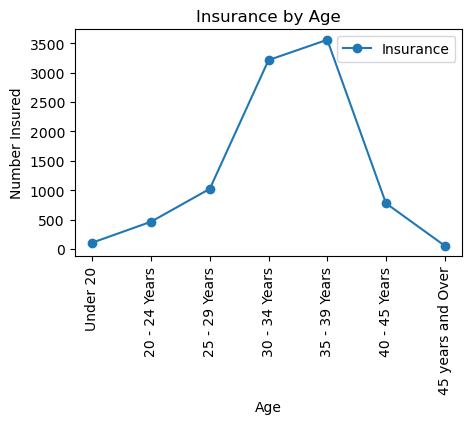

In [6]:
data = pd.read_csv('Data/Insurance_by_Age.csv', index_col='Age')
data = data.T
data

fig, ax = plt.subplots(figsize=(5,3), dpi=100)
x_pos = np.arange(7)

y = data.iloc[1, :] / 100
y = y*data.iloc[0, :]
ax.plot(x_pos, y, marker='o', label='Insurance')
ax.set_title('Insurance by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Number Insured')
ax.set_xticks(x_pos)
ax.set_xticklabels(data.columns, rotation=90)
ax.legend()

### Initiate Breastfeeding



In [8]:
# Percentage of total births taht initiate breastfeeding
age = pd.read_csv("Data/Age_and_Feeding_Type.csv")
age = age.iloc[0:7, 0:8]
age['pct']=age['Breast']/(age['Total'])*100  

age

,Age Group,Artificial,Breast,Combined,Total,pct
0,Under 20 Years,786,250,66,1102,22.686025
1,20-24 Years,3158,1632,388,5178,31.517961
2,25-29 Years,5409,4883,1099,11391,42.867176
3,30-34 Years,8284,12193,2470,22947,53.135486
4,35-39 Years,6458,10266,2004,18728,54.816318
5,40-44 Years,1380,2173,548,4101,52.987076
6,45 Years and Over,94,144,54,292,49.315068


## Generate Data Set

In [9]:
# the number of records
n = 100

### Variable 1 - Age 

In [10]:
age_dist = (np.random.triangular(left = 16, mode = 30, right = 50, size = 500)).astype(int)
age = rng.choice(age_dist, n)
df = pd.DataFrame(age, columns = ['Maternal Age'])

### Variable 2 - Civil Status

In [11]:
civstat_options = ['single', 'married', 'other']
df['Civil Status'] = rng.choice(civstat_options, n, p=[0.05, 0.39, 0.56])

### Varible 3 - Insurance

In [12]:
def ins_by_age (x):
        
        agerange_insurance = {range(15,20) : 10,
                                  range(20,25) : 9,
                                  range(25,30) : 9,
                                  range(30,35) : 14,
                                  range(35,40) : 19,
                                  range(40,45) : 19,
                                  range(45,50) : 20}
        
        for i in agerange_insurance:
                if x in i:
                        y =  rng.integers(1,100)
                        if y <= agerange_insurance[i]:
                              return True  
                        return False
                    
health_ins_status = np.array([ins_by_age(i) for i in age])

df['Health Insurance Status'] = health_ins_status

### Variable 4 - Initate Breastfeeding

In [23]:
def breastfeeding(x):
        
        bf_status = {range(15,20) : 23,
                     range(20,25) : 32,
                     range(25,30) : 43,
                     range(30,35) : 53,
                     range(35,40) : 55,
                     range(40,45) : 53,
                     range(45,50) : 50}

        a = age[x]  
        b = health_ins_status[x]  
        c = civil_status[x]  

        q = 3 if c == 'Married' else 1  
         
        for i in bf_status:
                if a in i:
                        y =  rng.integers(1,1000)
                        if y <= q*bf_status[i] or (b == True and y <= 500):
                              return True  
                        return False

initiate_bf = np.array([breastfeeding(i) for i in age])

df['Initiate Breastfeeding'] = initiate_bf

In [19]:
# https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin
# https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#frequently-used-options

pd.set_option("expand_frame_repr", True)

df

,Maternal Age,Civil Status,Health Insurance Status,Initiate Breastfeeding
0,22,other,False,False
1,30,other,False,False
2,37,married,False,True
3,41,other,False,False
4,35,single,False,False
5,34,married,False,False
6,39,other,False,False
7,41,other,True,False
8,26,other,False,True
9,39,married,False,False


## References

Borra, C., Iacovou, M., Sevilla, A. 2015. New evidence on breastfeeding and postpartum depression: the importance of understanding women’s intentions. Maternal and Child Health Journal, 19, pp. 887-907.

Dennis, C.L., McQueen, K. 2009. The relationship between infant-feeding outcomes and postpartum depression: a qualitative systematic review. Pediatrics, 123, pp. 736-751
